In [1]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

# 載入資料

In [50]:
data = pd.read_csv("C:/Users/wei/Documents/碩士/碩一/機器學習/lm2.csv")

In [51]:
data

,ID,ROA,ROE,Berry ratio,Current ratio,Debt ratio,Net worth/assets,Total asset turnover,Inventory turnover rate (times),cash_flow,After-tax net profit growth rate
0,2302,5.97,7.30,191.67,181.35,18.99,81.01,0.37,3.73,-11492,23853.74
1,2303,8.52,14.39,167.78,209.99,37.55,62.45,0.47,6.23,44723620,343.49
2,2329,-2.68,-5.97,78.85,129.47,47.51,52.49,0.91,11.00,-2608007,-145.26
3,2330,19.41,28.10,490.25,176.97,32.97,67.03,0.53,5.70,99488004,50.04
4,2337,8.87,16.35,177.78,182.04,45.07,54.93,0.63,2.05,534407,76.76
...,...,...,...,...,...,...,...,...,...,...,...
69,8110,1.17,1.74,67.93,143.29,33.88,66.12,0.34,14.26,318989,54.43
70,8131,10.10,11.68,924.38,631.25,13.18,86.82,0.72,14.79,1086102,11.10
71,8150,7.18,12.30,314.27,219.86,40.62,59.38,0.66,9.29,2706484,-8.38
72,8261,8.98,14.86,188.25,195.15,41.66,58.34,1.25,3.38,-1178,368.29


In [52]:
#data['free cash flow']=data.cash_flow.astype(float)

In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   ID                                74 non-null     int64  
 1   ROA                               74 non-null     float64
 2   ROE                               74 non-null     float64
 3   Berry ratio                       74 non-null     float64
 4   Current ratio                     74 non-null     float64
 5   Debt ratio                        74 non-null     float64
 6   Net worth/assets                  74 non-null     float64
 7   Total asset turnover              74 non-null     float64
 8   Inventory turnover rate (times)   74 non-null     float64
 9   cash_flow                         74 non-null     int64  
 10  After-tax net profit growth rate  74 non-null     float64
dtypes: float64(9), int64(2)
memory usage: 6.5 KB


In [30]:
data.columns

Index(['ID', 'ROA', 'ROE', 'Berry ratio', 'Current ratio', 'Debt ratio',
       'Net worth/assets', 'Total asset turnover',
       'Inventory turnover rate (times)', 'free cash flow',
       'After-tax net profit growth rate'],
      dtype='object')

In [55]:
col = ['ROA', 'ROE', 'Berry ratio', 'Current ratio', 'Debt ratio','Net worth/assets', 'Total asset turnover','Inventory turnover rate (times)', 'cash_flow',
       'After-tax net profit growth rate']

data2 = data[col]

In [56]:
data2

,ROA,ROE,Berry ratio,Current ratio,Debt ratio,Net worth/assets,Total asset turnover,Inventory turnover rate (times),cash_flow,After-tax net profit growth rate
0,5.97,7.30,191.67,181.35,18.99,81.01,0.37,3.73,-11492,23853.74
1,8.52,14.39,167.78,209.99,37.55,62.45,0.47,6.23,44723620,343.49
2,-2.68,-5.97,78.85,129.47,47.51,52.49,0.91,11.00,-2608007,-145.26
3,19.41,28.10,490.25,176.97,32.97,67.03,0.53,5.70,99488004,50.04
4,8.87,16.35,177.78,182.04,45.07,54.93,0.63,2.05,534407,76.76
...,...,...,...,...,...,...,...,...,...,...
69,1.17,1.74,67.93,143.29,33.88,66.12,0.34,14.26,318989,54.43
70,10.10,11.68,924.38,631.25,13.18,86.82,0.72,14.79,1086102,11.10
71,7.18,12.30,314.27,219.86,40.62,59.38,0.66,9.29,2706484,-8.38
72,8.98,14.86,188.25,195.15,41.66,58.34,1.25,3.38,-1178,368.29


# 資料簡述

In [57]:
data2.describe()

,ROA,ROE,Berry ratio,Current ratio,Debt ratio,Net worth/assets,Total asset turnover,Inventory turnover rate (times),cash_flow,After-tax net profit growth rate
count,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,7.400000e+01,74.000000
mean,10.106486,14.409054,187.729324,347.374595,34.381622,65.618378,0.785676,6.617568,3.107830e+06,473.081757
std,12.602113,17.392531,141.199920,300.483755,17.258426,17.258426,0.408512,6.729052,1.325494e+07,2830.728339
min,-12.840000,-43.040000,-32.160000,66.330000,0.490000,15.960000,0.010000,0.000000,-4.356725e+06,-589.320000
25%,3.960000,6.155000,117.650000,184.757500,22.240000,53.365000,0.530000,3.385000,-8.913500e+03,2.862500
50%,7.645000,14.080000,171.490000,243.170000,32.845000,67.155000,0.700000,4.970000,2.848605e+05,39.900000
75%,13.940000,19.187500,212.907500,368.250000,46.635000,77.760000,0.990000,6.772500,9.300835e+05,110.205000
max,76.710000,77.230000,924.380000,1966.690000,84.040000,99.510000,2.420000,49.620000,9.948800e+07,23853.740000


# 相關係數表

In [58]:
data_correlations = data.drop(['ID'], axis=1).corr(method='pearson')
data_correlations

,ROA,ROE,Berry ratio,Current ratio,Debt ratio,Net worth/assets,Total asset turnover,Inventory turnover rate (times),cash_flow,After-tax net profit growth rate
ROA,1.000000,0.929972,0.175467,0.199281,-0.330601,0.330601,0.134305,-0.054992,0.079668,0.016653
ROE,0.929972,1.000000,0.206651,0.087859,-0.226025,0.226025,0.243006,0.004588,0.097214,0.036328
Berry ratio,0.175467,0.206651,1.000000,-0.056441,-0.197228,0.197228,0.092331,0.351818,0.224796,-0.015867
Current ratio,0.199281,0.087859,-0.056441,1.000000,-0.652724,0.652724,-0.308998,-0.249287,-0.105584,-0.068381
Debt ratio,-0.330601,-0.226025,-0.197228,-0.652724,1.000000,-1.000000,0.212572,0.171108,0.001894,-0.076741
Net worth/assets,0.330601,0.226025,0.197228,0.652724,-1.000000,1.000000,-0.212572,-0.171108,-0.001894,0.076741
Total asset turnover,0.134305,0.243006,0.092331,-0.308998,0.212572,-0.212572,1.000000,-0.104829,-0.103141,-0.091174
Inventory turnover rate (times),-0.054992,0.004588,0.351818,-0.249287,0.171108,-0.171108,-0.104829,1.000000,-0.022999,-0.061120
cash_flow,0.079668,0.097214,0.224796,-0.105584,0.001894,-0.001894,-0.103141,-0.022999,1.000000,-0.039382
After-tax net profit growth rate,0.016653,0.036328,-0.015867,-0.068381,-0.076741,0.076741,-0.091174,-0.061120,-0.039382,1.000000


In [59]:
import seaborn as sns

# 相關係數熱圖

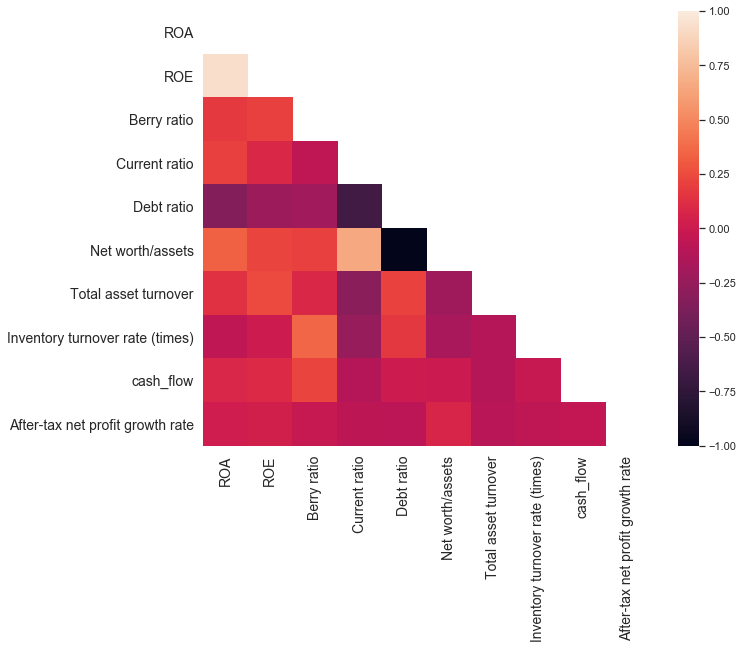

In [60]:
fig, ax = plt.subplots(figsize=(10, 8));

mask = np.zeros_like(data_correlations, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

ax = sns.heatmap(data_correlations, vmin=-1, vmax=1, mask=mask, ax=ax);

ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=14);
ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=14);

plt.show();